In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
import warnings
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Group Contributions

### Group Members: 
_Abraham Hernandez, Aiden Zhang, Andrew Glaros, Joshua Lim, Sven Anaya Pimentel, Xainab Hameed Mehr_

Abraham. Oversaw the focus of the group, making sure that the group stayed on course with the objective. This included checking if the group’s explanations and conclusions were important in the presentation, and making sure that the conclusions aligned with the overall objective.

Aiden. Spearheaded the EDA process, making sure that the variables had low correlation with each other and also assisted in data cleaning.

Andrew. Was in charge of taking note of the highs and lows of the group and making sure the results the group came up with were precise, efficient, and consistent with all other data. He also helped in the interpretation of the test statistics.

Joshua. Was in charge of replicating the OLS regression presented in the paper, finding datasets, cleaning the data, and running regression tests.

Sven. Supervised the creation of the presentation slides, provided contextual support when our group came up with different conclusions, and was in charge of putting together code, graphs, and explanations.

Xainab. Handled the modeling process to see which regression models were better suited for our variables and cleaned the code.

In all, we all worked together with equal participation, and consistently had meetings after class to contribute to and update each other on the progress of our individual parts.


# Abstract

The COVID-19 pandemic severely disrupted the U.S. economy, particularly affecting low-wage workers. This study uses a novel public database with private sector data to analyze the pandemic's economic impact, tracking weekly statistics on consumer spending, business revenues, job postings, and employment rates. 
We aimed to evaluate the impact Covid risk exposure and unemployment insurance benefits had on low wage employment. In order to do this, we combined five data frames, used various plots to show relationships between variables, and replicated the OLS model. We then compared it with other regression models, selected the best one, improved it through hyperparameter tuning, and validated the model using k-fold cross-validation.
We recreated their model and found it unsuitable for predicting changes in low-wage employment. Decision tree and random forest regressions proved more effective. We concluded that the COVID-19 pandemic had a massive impact on low-wage employment.

# Project Background

The COVID-19 pandemic, caused by the novel coronavirus SARS-CoV-2, made significant economic disruptions globally, especially in the U.S. The pandemic led to widespread business closures, job losses, and changes in consumer behavior. Low-wage workers were hit especially hard, facing higher unemployment rates and greater economic uncertainty compared to higher-wage workers. To support the economic recovery and market discrepancies, understanding the reasons behind this decline in low-wage employment during/after the pandemic is crucial.
This study explores the economic impact of the COVID-19 pandemic on the United States economy, specifically from March 2020 - December 2021. The main idea revolves around utilizing a novel public database constructed from private sector data to provide a comprehensive analysis while also tracking the economic impact of the COVID-19 pandemic. This database enables the authors to report weekly statistics on consumer spending, business revenues, job postings, and employment rates disaggregated by county, sector, and income group. 
A key finding of this study was the uneven economic recovery across different income groups and regions. Low-wage workers experienced a more significant and prolonged reduction in employment compared to high-wage workers. This paper emphasizes the importance of understanding the continuing effects of past economic conditions and current economic conditions in explaining these disparities. The authors analyzed low-wage employment rates across counties, linking changes in employment to median rents and other economic conditions (E.g. Government Assistance Programs), providing insight on factors behind persistent reductions in low-wage employment
Quantitative analysis is crucial for understanding the economic impact of the pandemic. By using detailed and up-to-date data, researchers can identify patterns and connections not evident in summary statistics. This helps policymakers make effective interventions and support specific groups, contributing to a stronger recovery. The study’s real-time analysis, based on public statistics from private sector data, provides valuable insights for addressing economic challenges. Empirical macroeconomists can use the dataset to guide policy adjustments and alleviate disparities in economic outcomes.

# Project Objective

The purpose of this project is to evaluate the effect of COVID-19 risk exposure and unemployment insurance extensions on employment patterns across counties. This involves analyzing how varying levels of COVID-19 risk and changes in unemployment insurance policies influence employment rates and job recovery in different regions.
We aim to predict employment patterns based on COVID-19 risk exposure and unemployment insurance extensions, and infer the causal relationships between these variables and employment outcomes:
Importance
Understanding the differential impact of COVID exposure and UI extensions helps policymakers design more effective policies by identifying factors that most significantly impact economic recovery within different regions.
Insight gathered from this analysis assists in formulating strategies that balance public health with economic recovery (ie. if the data shows that areas with high COVID-19 risk but strong unemployment insurance support have better employment outcomes, it suggests that financial safety nets can help mitigate the economic impact of the pandemic. Limiting the impact of on the economy)

# Data Decription

The data used was derived from various private sector sources, which were anonymized, cleaned, and aggregated to create a new public database that would track economic activity in the U.S. Data included lots of details, with it being disaggregated by county/Zip Code, industry sectors, or/and income levels. Many aspects are covered in economic activity, such as employment rates, rent, spanning across various geographic regions in the U.S. The data collected was updated weekly throughout March 2020 - December 2021, offering real-time insights into economic trends during the COVID-19 pandemic. To ensure representativeness and accuracy, the data is benchmarked against publicly available statistics, while privacy is maintained by reporting changes since January 2020, then aggregating it to prevent disclosure of private information.

FY2018_50_County_rev.csv
The granularity is at the county level and each row represents the amount of rent a homeowner pays relative to the state and county they live in.
Employment - County - Weekly.csv
The granularity is at the county level and each row represents the employment levels for a specific income bracket for a specified county at a point in time after January 4, 2020.
COVID - County - Daily 2021.csv
The granularity is at the county level and each row represents the COVID metrics for a specific county at a specific time. Essentially it gives all cases, death and vaccine rate, both new and old.
UI - Max Weeks - State.csv
Each row represents unemployment claims for a specific state at a specific point in time, detailing rates and counts of initial and continued claims across different unemployment programs.
GeoIDs - County.csv
The granularity is as the county level, with additional attributes that provide context about the county’s relationship to cities, commuting zones, states and population data  for a given year.

# Data Cleaning

In [ ]:
df_covid_2021 = pd.read_csv('COVID - County - Daily 2021.csv')

df_covid_2021_oct_to_dec = df_covid_2021[df_covid_2021['month'] > 9]

df_covid_2021_oct_to_dec['date'] = pd.to_datetime(df_covid_2021_oct_to_dec[['year', 'month','day']])

df_covid = df_covid_2021_oct_to_dec[['date', 'countyfips', 'case_rate']]

df_covid['case_rate'] = pd.to_numeric(df_covid['case_rate'], errors='coerce')

df_covid['countyfips'] = df_covid['countyfips'].astype(str)

In [ ]:
median_rent_df = pd.read_csv('FY2018_50_County_rev.csv')
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL
...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI


In [ ]:
median_rent_df['cousub'] = median_rent_df['cousub'].astype(str)
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL
...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI


In [ ]:
median_rent_df['cousub_len'] = median_rent_df['cousub'].str.len()
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha,cousub_len
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL,5
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL,5
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL,5
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL,5
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL,5
...,...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR,5
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR,5
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI,5
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI,5


In [ ]:
def remove_last_digits(row):
    length_to_remove = row['cousub_len']
    return row['fips2010'][:-length_to_remove]

In [ ]:
median_rent_df['fips2010'] = median_rent_df['fips2010'].astype(str)
median_rent_df['fips2010_trimmed'] = median_rent_df.apply(remove_last_digits, axis=1)
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha,cousub_len,fips2010_trimmed
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL,5,1001
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL,5,1003
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL,5,1005
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL,5,1007
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL,5,1009
...,...,...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR,5,72151
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR,5,72153
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI,5,78010
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI,5,78020


In [ ]:
median_rent_df = median_rent_df.rename(columns={'fips2010_trimmed':'countyfips'})
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha,cousub_len,countyfips
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL,5,1001
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL,5,1003
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL,5,1005
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL,5,1007
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL,5,1009
...,...,...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR,5,72151
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR,5,72153
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI,5,78010
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI,5,78020


In [ ]:
median_rent_df.columns

Index(['fips2010', 'rent50_2', 'state', 'county', 'cousub', 'cntyname', 'name',
       'hu2010', 'state_alpha', 'cousub_len', 'countyfips'],
      dtype='object')

In [ ]:
# Function to add one day without moving to the next year
def add_one_day(date):
    new_date = date + pd.DateOffset(days=1)
    if new_date.year != date.year:
        new_date = new_date.replace(year = date.year, month=12, day=31)
    return new_date


# Apply the function to the 'date' column
df_covid['new_date'] = df_covid['date'].apply(add_one_day)

df_covid = df_covid.drop(columns = {'date'})
df_covid = df_covid.rename(columns = {'new_date' : 'date'})
df_covid

,countyfips,case_rate,date
857766,1001,17370.0,2021-10-02
857767,1003,16281.0,2021-10-02
857768,1005,14097.0,2021-10-02
857769,1007,18369.0,2021-10-02
857770,1009,16893.0,2021-10-02
...,...,...,...
1146825,56037,19578.0,2021-12-31
1146826,56039,24599.0,2021-12-31
1146827,56041,20487.0,2021-12-31
1146828,56043,23996.0,2021-12-31


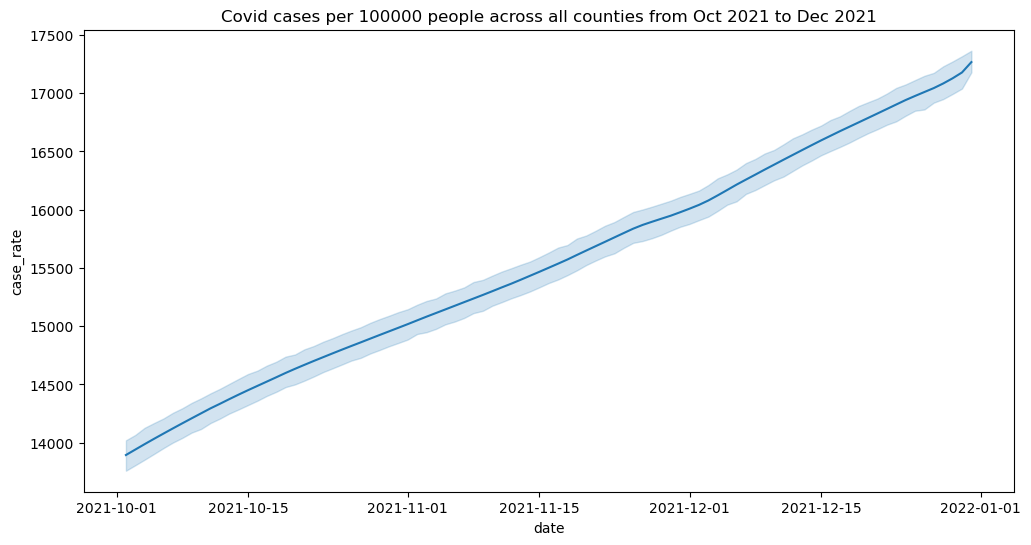

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))  # Width, height in inches

ax = sns.lineplot(data=df_covid, x="date", y="case_rate")

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("Covid cases per 100000 people across all counties from Oct 2021 to Dec 2021")

plt.show()

In [ ]:
df_eomployment = pd.read_csv('Employment - County - Weekly.csv')
df_eomployment.head()

,year,month,day_endofweek,countyfips,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed
0,2020,1,17,1001,.,.,.,.,.,.,.,.
1,2020,1,17,1005,.,.,.,.,.,.,.,.
2,2020,1,17,1007,.,.,.,.,.,.,.,.
3,2020,1,17,1009,-.00782,.,.,.,.,.,.,.
4,2020,1,17,1015,.156,.312,.0158,.,.,.0298,.19,.


In [ ]:
df_eomployment_2020_to_2021 = df_eomployment[df_eomployment['year'] < 2022]

df_eomployment_2020_jan_to_jul = df_eomployment[(df_eomployment['year'] == 2020) & (df_eomployment['month'] <= 7)]

df_eomployment_2020_to_2021_temp1 = pd.merge(df_eomployment_2020_to_2021, df_eomployment_2020_jan_to_jul[['year', 'month', 'day_endofweek', 'countyfips', 'emp_incq1']], on = ['year', 'month', 'day_endofweek', 'countyfips'], how = 'left')

df_eomployment_2020_to_2021_temp2 = df_eomployment_2020_to_2021_temp1[['year', 'month', 'day_endofweek', 'countyfips', 'emp_incq1_x', 'emp_incq1_y']]

df_eomployment_2020_to_2021_temp2 = df_eomployment_2020_to_2021_temp2.rename(columns = {'day_endofweek':'day', 'emp_incq1_x':'emp_incq1_2020_to_2021', 'emp_incq1_y':'emp_incq1_2020_jan_to_jul'})

df_eomployment_2020_to_2021_temp2['date'] = pd.to_datetime(df_eomployment_2020_to_2021_temp2[['year', 'month','day']])

df_eomployment_2020_to_2021_temp2 = df_eomployment_2020_to_2021_temp2.drop(columns = {'year', 'month', 'day'})

df_eomployment_2020_to_2021_temp3 = df_eomployment_2020_to_2021_temp2[pd.to_numeric(df_eomployment_2020_to_2021_temp2['emp_incq1_2020_to_2021'], errors = 'coerce')>0]

df_eomployment_2020_to_2021_temp4 = df_eomployment_2020_to_2021_temp3.fillna(0)

df_eomployment_2020_to_2021_temp4['emp_incq1_2020_to_2021'] = pd.to_numeric(df_eomployment_2020_to_2021_temp4['emp_incq1_2020_to_2021'], errors = 'coerce')
df_eomployment_2020_to_2021_temp4['emp_incq1_2020_jan_to_jul'] = pd.to_numeric(df_eomployment_2020_to_2021_temp4['emp_incq1_2020_jan_to_jul'], errors = 'coerce')

df_eomployment_2020_to_2021_temp4['countyfips'] = df_eomployment_2020_to_2021_temp4['countyfips'].astype(str)

In [ ]:
#omit California, Massachusetts, and New York
df_geoid = pd.read_csv('GeoIDs - County.csv')
df_geoid_UI = pd.merge(df_geoid, df_UI, on = 'statename')
df_geoid_UI = df_geoid_UI[~df_geoid_UI['statename'].isin(['California', 'Massachusetts', 'New York'])]

df_geoid_UI['countyfips'] = df_geoid_UI['countyfips'].astype(str)


df_covid = df_covid[df_covid['countyfips'].isin(df_geoid_UI['countyfips'])]

df_eomployment_2020_to_2021_temp4 = df_eomployment_2020_to_2021_temp4[df_eomployment_2020_to_2021_temp4['countyfips'].isin(df_geoid_UI['countyfips'])]

In [ ]:
df_geoid_UI

,countyfips,countyname,cityid,cityname,cz,czname,statename,statefips,stateabbrev,county_pop2019,max_weeks
0,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,14
1,1003,Baldwin,NaN,NaN,11001.0,Mobile,Alabama,1,AL,223234,14
2,1005,Barbour,NaN,NaN,10301.0,Eufaula,Alabama,1,AL,24686,14
3,1007,Bibb,NaN,NaN,10801.0,Tuscaloosa,Alabama,1,AL,22394,14
4,1009,Blount,NaN,NaN,10700.0,Birmingham,Alabama,1,AL,57826,14
...,...,...,...,...,...,...,...,...,...,...,...
3113,55133,Waukesha,NaN,NaN,24100.0,Milwaukee,Wisconsin,55,WI,404198,26
3114,55135,Waupaca,NaN,NaN,22500.0,Appleton,Wisconsin,55,WI,50990,26
3115,55137,Waushara,NaN,NaN,22500.0,Appleton,Wisconsin,55,WI,24443,26
3116,55139,Winnebago,NaN,NaN,22500.0,Appleton,Wisconsin,55,WI,171907,26


In [ ]:
df_covid

,countyfips,case_rate,date
857766,1001,17370.0,2021-10-02
857767,1003,16281.0,2021-10-02
857768,1005,14097.0,2021-10-02
857769,1007,18369.0,2021-10-02
857770,1009,16893.0,2021-10-02
...,...,...,...
1146802,55133,18986.0,2021-12-31
1146803,55135,20102.0,2021-12-31
1146804,55137,18427.0,2021-12-31
1146805,55139,20295.0,2021-12-31


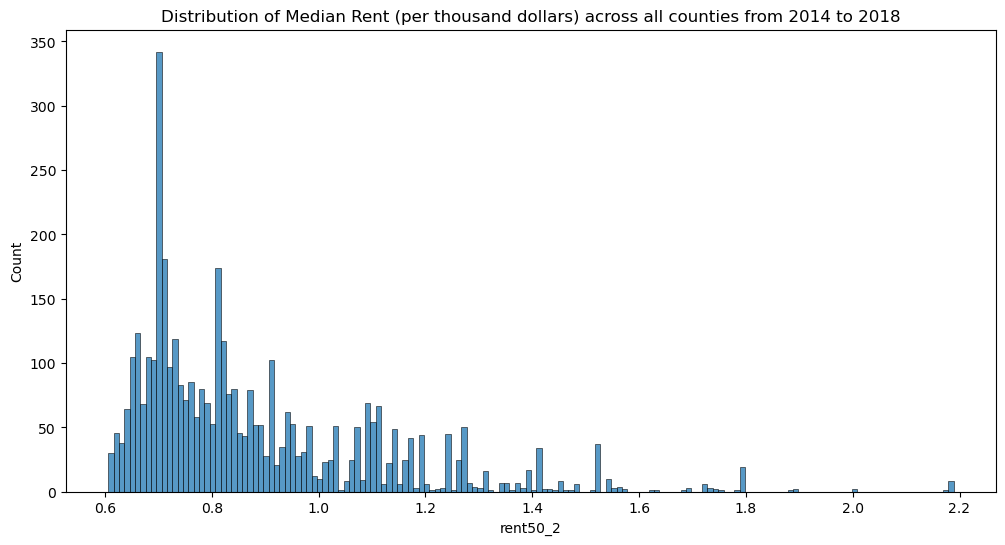

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))  # Width, height in inches

ax = sns.histplot(data=median_rent_df, x="rent50_2", binwidth = 0.01) #, hue = "countyfips")

plt.title("Distribution of Median Rent (per thousand dollars) across all counties from 2014 to 2018")

plt.show()



df_eomployment_2020_to_2021_temp4



# Set the size of the plot
plt.figure(figsize=(24, 6))  # Width, height in inches

ax = sns.lineplot(data=df_eomployment_2020_to_2021_temp4, x="date", y="emp_incq1_2020_to_2021") #, hue = "countyfips")

# bx = sns.lineplot(data=df_covid, x="date", y=df_covid["case_rate"]/90000) # , hue = "countyfips")

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("Change of employment in 1st income quartile from Jan 2020 to Dec 2021")

plt.show()

df_UI = pd.read_csv('UI - Max Weeks - State.csv')
df_UI = df_UI.rename(columns = {'TABLE 1 Unemployment Rates and Weeks of Unemployment Insurance (UI) Available': 'statename', 'Unnamed: 1': 'max_weeks'})

df_UI = df_UI.iloc[1: , :]
df_UI.head()

median_rent_df = median_rent_df[median_rent_df['countyfips'].isin(df_geoid_UI['countyfips'])]
median_rent_df

median_rent_df = median_rent_df[['countyfips', 'rent50_2']]
median_rent_df['rent50_2'] = median_rent_df['rent50_2'] / 1000
median_rent_df

In [ ]:
median_rent_df['countyfips'] = median_rent_df['countyfips'].astype(str)
median_rent_df

,fips2010,rent50_2,state,county,cousub,cntyname,name,hu2010,state_alpha,cousub_len,countyfips
0,100199999,890,1,1,99999,Autauga County,Autauga County,22135.0,AL,5,1001
1,100399999,929,1,3,99999,Baldwin County,Baldwin County,104061.0,AL,5,1003
2,100599999,706,1,5,99999,Barbour County,Barbour County,11829.0,AL,5,1005
3,100799999,955,1,7,99999,Bibb County,Bibb County,8981.0,AL,5,1007
4,100999999,955,1,9,99999,Blount County,Blount County,23887.0,AL,5,1009
...,...,...,...,...,...,...,...,...,...,...,...
4765,7215199999,577,72,151,99999,Yabucoa Municipio,Yabucoa Municipio,15798.0,PR,5,72151
4766,7215399999,390,72,153,99999,Yauco Municipio,Yauco Municipio,18020.0,PR,5,72153
4767,7801099999,1017,78,10,99999,St. Croix,St. Croix,25275.0,VI,5,78010
4768,7802099999,1596,78,20,99999,St. John,St. John,3453.0,VI,5,78020


In [ ]:
df_final = pd.merge(df_eomployment_2020_to_2021_temp4, df_geoid_UI[['countyfips', 'max_weeks']], on = ['countyfips'])
df_final['max_weeks'] = pd.to_numeric(df_final['max_weeks'], errors='coerce')
df_final = pd.merge(df_final, df_covid, on = ['date', 'countyfips'], how = 'left')
df_final = pd.merge(df_final, median_rent_df, on = ['countyfips'], how = 'left')
df_final = df_final.fillna(0)

In [ ]:
df_final

,countyfips,emp_incq1_2020_to_2021,emp_incq1_2020_jan_to_jul,date,max_weeks,case_rate,rent50_2
0,1015,0.312000,0.312000,2020-01-17,14,0.0,0.721
1,1089,0.023500,0.023500,2020-01-17,14,0.0,0.768
2,1101,0.008240,0.008240,2020-01-17,14,0.0,0.890
3,1103,0.000474,0.000474,2020-01-17,14,0.0,0.703
4,1117,0.013500,0.013500,2020-01-17,14,0.0,0.955
...,...,...,...,...,...,...,...
20310,55033,0.359000,0.000000,2021-12-31,26,20877.0,0.761
20311,55055,0.072500,0.000000,2021-12-31,26,17910.0,0.878
20312,55055,0.072500,0.000000,2021-12-31,26,17998.0,0.878
20313,55083,0.003420,0.000000,2021-12-31,26,22986.0,0.701


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20315 entries, 0 to 20314
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   countyfips                 20315 non-null  object        
 1   emp_incq1_2020_to_2021     20315 non-null  float64       
 2   emp_incq1_2020_jan_to_jul  20315 non-null  float64       
 3   date                       20315 non-null  datetime64[ns]
 4   max_weeks                  20315 non-null  int64         
 5   case_rate                  20315 non-null  float64       
 6   rent50_2                   20315 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB


# Exploratory Data Analysis

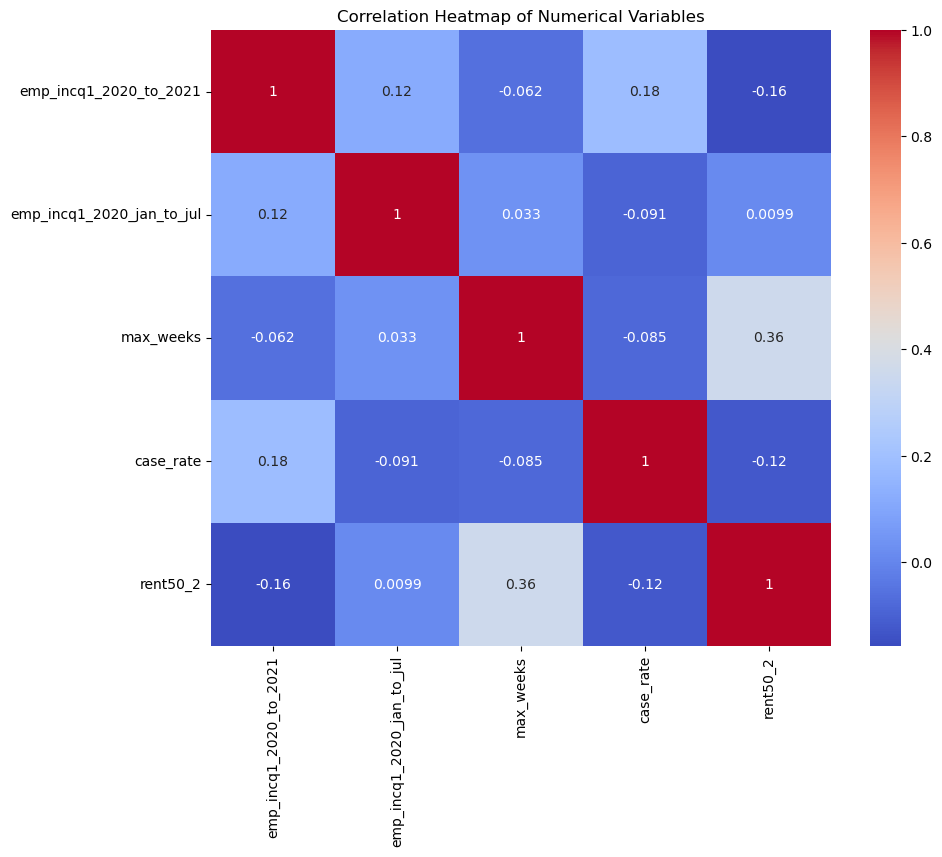

In [ ]:
# Define the numerical variables
numerical_vars = ['emp_incq1_2020_to_2021', 'emp_incq1_2020_jan_to_jul', 'max_weeks', 'case_rate', 'rent50_2']

# Subset the DataFrame with numerical variables
df_numerical = df_final[numerical_vars]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


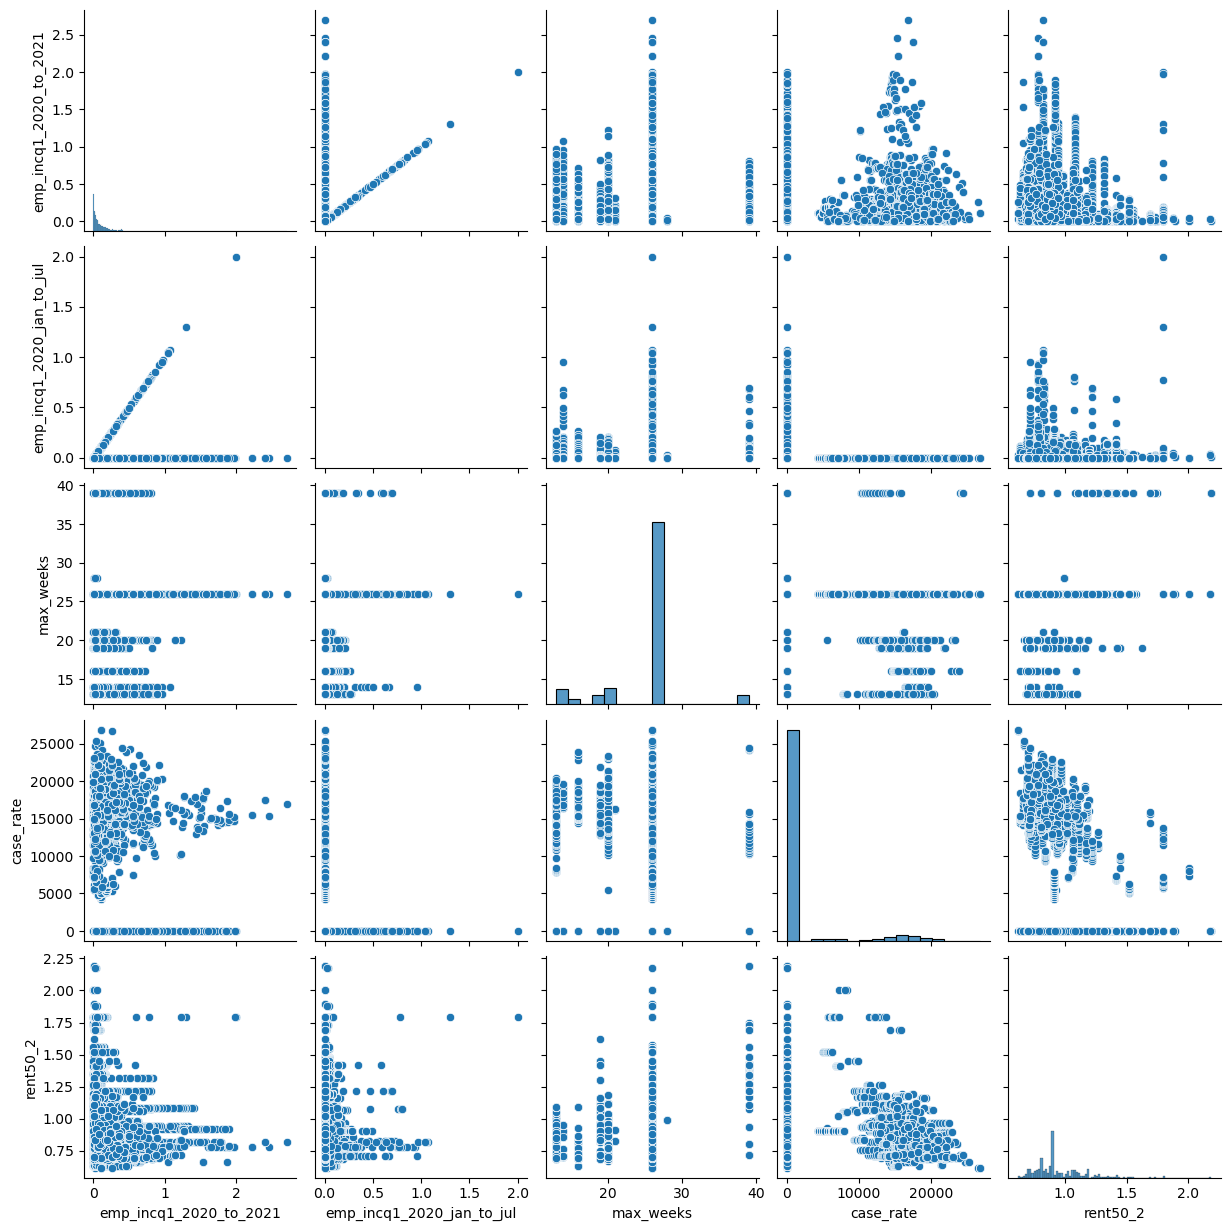

In [ ]:
# Create a pair plot
sns.pairplot(df_final)

# Show the plot
plt.show()

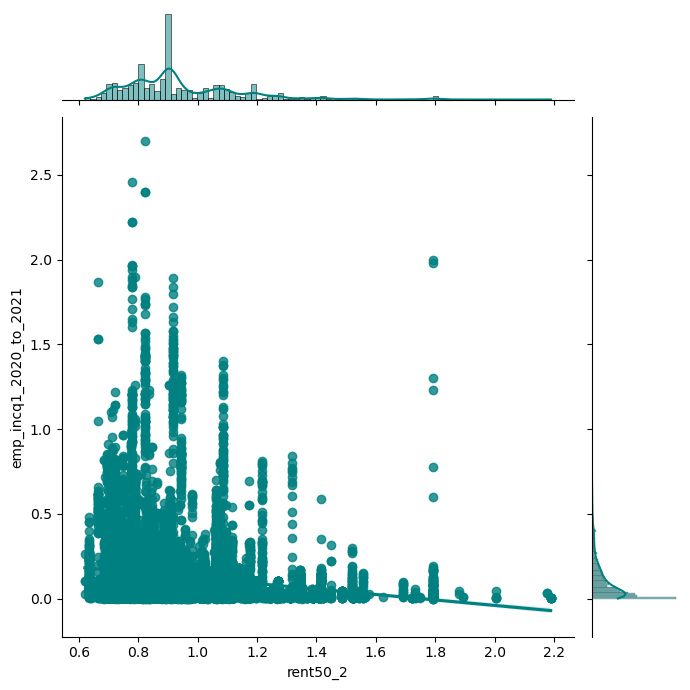

In [ ]:
sns.jointplot(x="rent50_2", y="emp_incq1_2020_to_2021", data=df_final, kind='reg', color='teal', height=7)
plt.show()

In [ ]:
lr = ols('emp_incq1_2020_to_2021 ~ emp_incq1_2020_jan_to_jul + case_rate + rent50_2 + max_weeks-1',df_final).fit()
print(lr.summary())

                                   OLS Regression Results                                  
Dep. Variable:     emp_incq1_2020_to_2021   R-squared (uncentered):                   0.322
Model:                                OLS   Adj. R-squared (uncentered):              0.322
Method:                     Least Squares   F-statistic:                              2413.
Date:                    Thu, 27 Jun 2024   Prob (F-statistic):                        0.00
Time:                            12:07:04   Log-Likelihood:                          4346.9
No. Observations:                   20315   AIC:                                     -8686.
Df Residuals:                       20311   BIC:                                     -8654.
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                                coef    std err          t      P>|t|      [0.02

In [ ]:
lr1 = ols('emp_incq1_2020_to_2021 ~ rent50_2',df_final).fit()
print(lr1.summary())

                              OLS Regression Results                              
Dep. Variable:     emp_incq1_2020_to_2021   R-squared:                       0.025
Model:                                OLS   Adj. R-squared:                  0.025
Method:                     Least Squares   F-statistic:                     516.6
Date:                    Thu, 27 Jun 2024   Prob (F-statistic):          5.89e-113
Time:                            12:07:04   Log-Likelihood:                 4270.6
No. Observations:                   20315   AIC:                            -8537.
Df Residuals:                       20313   BIC:                            -8521.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
lr2 = ols('emp_incq1_2020_to_2021 ~ rent50_2 + case_rate + max_weeks ',df_final).fit()
print(lr2.summary())

                              OLS Regression Results                              
Dep. Variable:     emp_incq1_2020_to_2021   R-squared:                       0.053
Model:                                OLS   Adj. R-squared:                  0.053
Method:                     Least Squares   F-statistic:                     376.3
Date:                    Thu, 27 Jun 2024   Prob (F-statistic):          7.29e-238
Time:                            12:07:04   Log-Likelihood:                 4564.9
No. Observations:                   20315   AIC:                            -9122.
Df Residuals:                       20311   BIC:                            -9090.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
lr3 = ols('emp_incq1_2020_to_2021 ~ emp_incq1_2020_jan_to_jul + case_rate + max_weeks ',df_final).fit()
print(lr3.summary())

                              OLS Regression Results                              
Dep. Variable:     emp_incq1_2020_to_2021   R-squared:                       0.054
Model:                                OLS   Adj. R-squared:                  0.054
Method:                     Least Squares   F-statistic:                     390.1
Date:                    Thu, 27 Jun 2024   Prob (F-statistic):          2.27e-246
Time:                            12:07:04   Log-Likelihood:                 4584.5
No. Observations:                   20315   AIC:                            -9161.
Df Residuals:                       20311   BIC:                            -9129.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

# Modeling

In [ ]:
data = df_final

# split the data into features and target variable
X = data.drop(['countyfips', 'date', 'emp_incq1_2020_to_2021'], axis=1)
y = data['emp_incq1_2020_to_2021']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))

Linear Regression R-squared: 0.063, MSE: 0.037
Lasso Regression R-squared: 0.027, MSE: 0.039
Ridge Regression R-squared: 0.063, MSE: 0.037
ElasticNet R-squared: 0.027, MSE: 0.039
Decision Trees Regression R-squared: 0.731, MSE: 0.011
Random Forest Regression R-squared: 0.742, MSE: 0.010


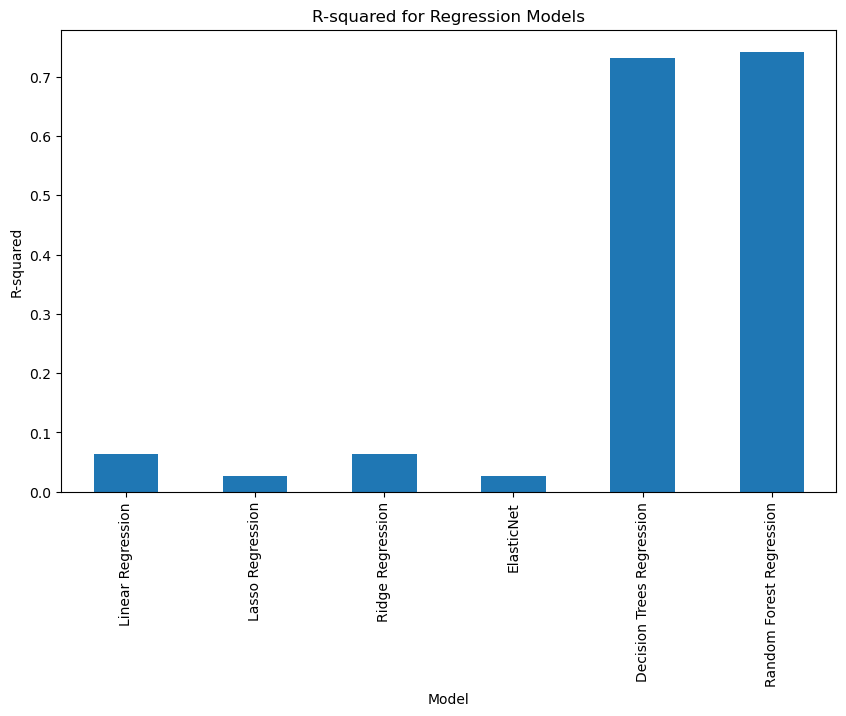

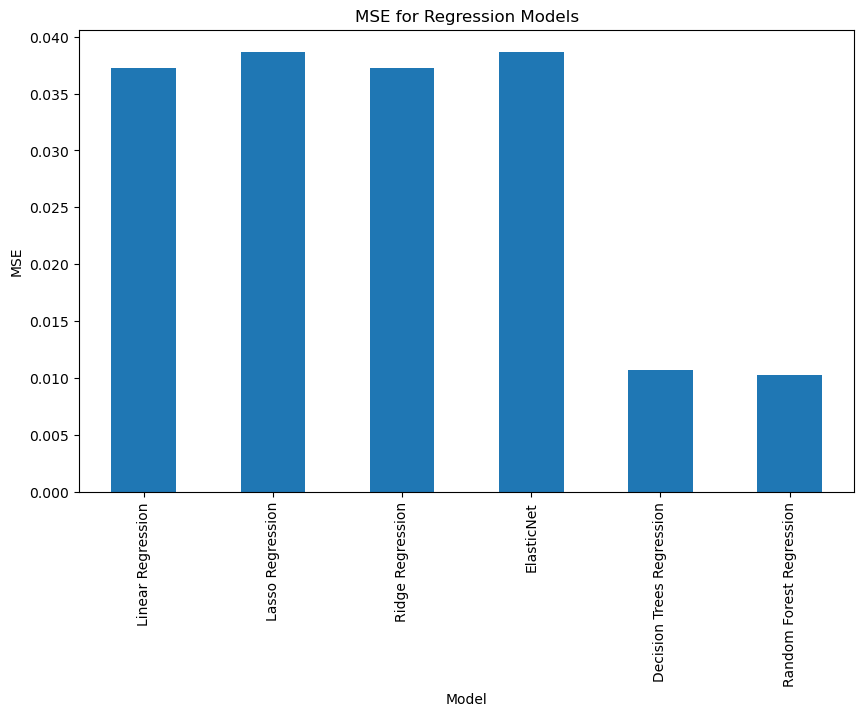

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
          }

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

Decision trees and random forests are showing the best results from amongst the machine learning models that we are experimenting with. Further, I will now see if we there is further room for improvement in our ridge regression model through hyperparameter tuning and further assess the validity of the model by performing k fold cross validation

In [ ]:
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# load the data
data = df_final

# split the data into features and target variable
X = data[['rent50_2', 'emp_incq1_2020_jan_to_jul', 'case_rate', 'max_weeks']]
y = data['emp_incq1_2020_to_2021']

# Define the alpha/lambda values
alphas = [0.1, 1.0, 2.5, 5, 6]

# Define the number of folds
n_folds = 10

# Initialize lists to store the results
results = []

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for alpha in alphas:

    # Perform Ridge regression
    ridge_cv = RidgeCV(alphas=[alpha], cv=kf)
    ridge_cv.fit(X_train, y_train)
    ridge_train_pred = ridge_cv.predict(X_train)
    ridge_test_pred = ridge_cv.predict(X_test)
    ridge_train_r2 = r2_score(y_train, ridge_train_pred)
    ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
    ridge_train_rmse = np.sqrt(ridge_train_mse)
    ridge_test_r2 = r2_score(y_test, ridge_test_pred)
    ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
    ridge_test_rmse = np.sqrt(ridge_test_mse)
    results.append(['Ridge', alpha, ridge_train_r2, ridge_train_mse, ridge_train_rmse, ridge_test_r2, ridge_test_mse, ridge_test_rmse])


# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Print the results table
results_df

,Model,Alpha,Train R-squared,Train MSE,Train RMSE,Test R-squared,Test MSE,Test RMSE
0,Ridge,0.1,0.072161,0.036509,0.191073,0.063263,0.037245,0.192990
1,Ridge,1.0,0.072153,0.036509,0.191074,0.063292,0.037244,0.192987
2,Ridge,2.5,0.072113,0.036511,0.191078,0.063310,0.037243,0.192985
3,Ridge,5.0,0.071985,0.036516,0.191092,0.063274,0.037245,0.192989
4,Ridge,6.0,0.071917,0.036519,0.191099,0.063240,0.037246,0.192993


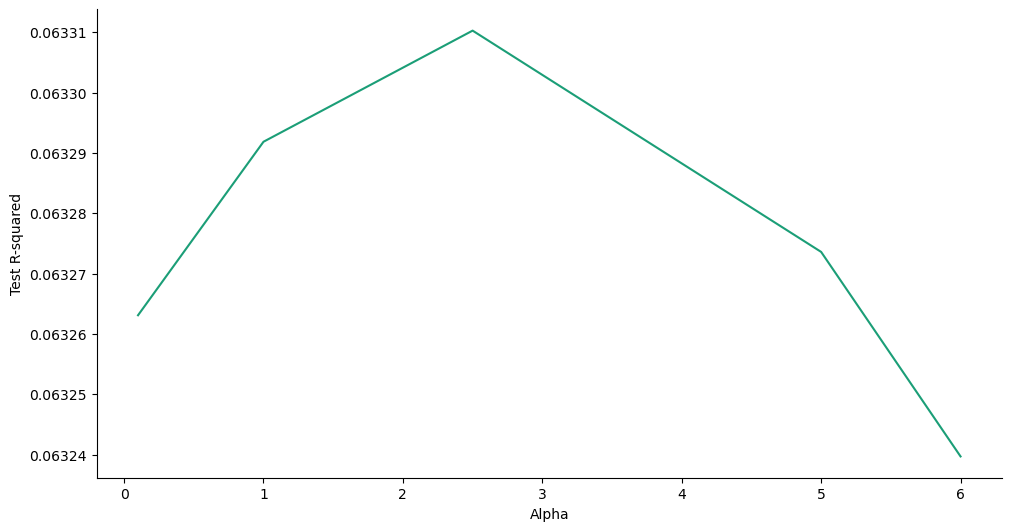

In [ ]:
# @title Alpha vs Test MSE


def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Alpha']
  ys = series['Test R-squared']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Alpha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Alpha')
_ = plt.ylabel('Test R-squared')

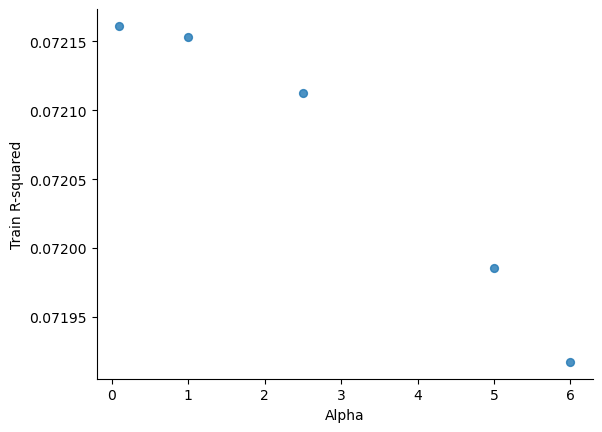

In [ ]:
# @title Alpha vs Train R-squared

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Alpha', y='Train R-squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

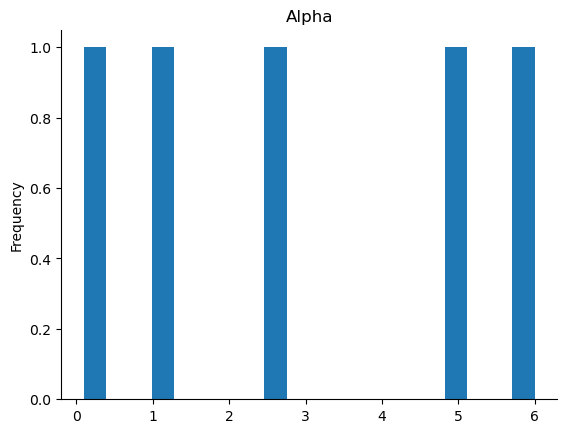

In [ ]:
# @title Alpha

from matplotlib import pyplot as plt
results_df['Alpha'].plot(kind='hist', bins=20, title='Alpha')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Now using performance results, we will calculates the average performance metrics for each model type across different alpha values, allowing us to compare the performance of different models. Note that the best model can be determined based on our chosen performance metric(s) and criteria.
# Group the results by model type (Lasso, Ridge, ElasticNet)
grouped_results = results_df.groupby('Model')

# Calculate the average performance metrics for each model type
average_results = grouped_results.mean()

# Display the average results
average_results

,Alpha,Train R-squared,Train MSE,Train RMSE,Test R-squared,Test MSE,Test RMSE
Model,,,,,,,
Ridge,2.92,0.072066,0.036513,0.191083,0.063276,0.037245,0.192989


In [ ]:
from stargazer.stargazer import Stargazer

# Combine regression results using stargazer
stargazer = Stargazer([lr1, lr2, lr3])

# Render HTML table
html_table = stargazer.render_html()
print(html_table)

# If you want to save it to an HTML file
with open('regression_results.html', 'w') as f:
    f.write(html_table)


<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable: emp_incq1_2020_to_2021</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>

<tr><td style="text-align:left">Intercept</td><td>0.281<sup>***</sup></td><td>0.249<sup>***</sup></td><td>0.161<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.007)</td><td>(0.009)</td><td>(0.007)</td></tr>
<tr><td style="text-align:left">case_rate</td><td></td><td>0.000<sup>***</sup></td><td>0.000<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.000)</td><td>(0.000)</td></tr>
<tr><td style="text-align:left">emp_incq1_2020_jan_to_jul</td><td></td><td></td><td>0.502<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td

# Interpretation and Conclusion

Our research question is if increases in rent and increases in case rates had an effect on employment. To answer this, we duplicated a regression model done in The Economic Impacts of COVID-19 by first pulling data from private sources. The variables used were, Median Two Bedroom rents, Changes in Low-wage Employment from Jan. 2020 – Jul. 2020, Average Daily COVID-19 Cases from Oct. 2021 – Dec. 2021, and Maximum Weeks of State UI Benefits in 2021. These were used as features to predict changes in bottom-wage-quartile employment rates from Jan. 2020 to Dec. 2021, which is the target variable in the study. We found that as rent and covid cases increased, employment decreased. In Particular, we found that rent and employment were closely correlated.
Using an OLS model as done in the study, we got an R-squared of the model being quite small, which is expected when using cross-validation. Using only the variable with the most weight, we got an R-squared of 0.025, a standard error of 0.196, and an F-statistic of 516.620. Using all the variables, we got an R-squared of 0.054, a standard error of 0.193, and an F-statistic of 390.087. Since the beta coefficients are significant here, we reject the null that increases in COVID case rates and rent do not have an effect on employment. This conclusion is supported by our EDA that shows distinct correlations between rapid shifts in rent and COVID cases and unemployment rates. Furthermore, we proved that there is a small correlation between the features used to form this model, limiting the chance of collinearity.
We went further and created models using Lasso regression, Ridge regression, Elastic Net, Decision Tree, and Random Forest. Using a training set of 80% of the data and a testing set of 20% of the data, we found that the models that best fit the data were Decision Tree and Random Forest. Using these techniques, we got an R-squared of over 0.7, which is a dramatic increase in fitting. Furthermore, we obtained these results after splitting our data into test and training sets, which lowers the chance of overfitting.
These combined results show that when rent increases and COVID cases rise, employment rates tend to decrease. In terms of addressing bias, we are not sure if the relationships are causal but only that they are correlated. If the main objective is to keep employment rates high, we propose to decision-makers to prioritize investing in rent controls, as this was the variable most correlated with employment.These results are interesting because it is tempting to associate employment first with COVID rates, but according to the data in the OLS model that we duplicated in the study, employment is more correlated with rent prices. We believe this is valuable information for policymakers to be aware of when making decisions affecting the general public. Our model is semi-flawed as we did not include demographic controls, which could have provided more precise results. We also do not know the sampling technique used to create the stats. They also omitted large states such as California, Massachusetts, and New York from the study, which could make the model not appropriate for larger population states.